# Sales Analysis



## Importing necessary libraries

In [7]:
import pandas as pd
import os

### Task #1: Merging 12 months of sales data into a single file

In [30]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

files = [file for file in os.listdir('./Sales_data')]

allMonthsData = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    allMonthsData = pd.concat([allMonthsData, df])

allMonthsData.to_csv('all_data.csv', index = False)



## Read in updated dataframe

In [31]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Clean up data!

### Drop rows of NAN

In [32]:
nan_df = all_data[all_data.isna().any(axis=1)]          # Nan_df is a new data frame to show every NaN values!
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
all_data = all_data.dropna(how='all')                  # Dropping all rows with NaN
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Find 'Or' and delete it
We got this error while trying to create the month column

In [34]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']         # indexing all_data with the condition of Order Date equal to 'Or'
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
518,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1148,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1154,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2877,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2892,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185163,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185550,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186562,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186631,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [35]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']         # Dropping the columns that where printed above
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Convert columns to the correct type

In [39]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])      # Make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])                  # Make float
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## Augment data with additional columns

### Task 2: Add Month Column

In [36]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 3: Add a sales column

In [40]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186845,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186846,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


### Rearanging columns

In [42]:
col = list(all_data.columns.values)
all_data = all_data[col[0:4] + [col[-1]] + [col[4]] + [col[-2]] + [col[5]]]
all_data

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,9,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700.00,700.00,09/01/19 16:00,9,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700.00,700.00,09/23/19 07:39,9,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,9,"511 Forest St, San Francisco, CA 94016"


### Task 4: Add a city column

In [58]:
# Let's use .apply()
# all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])            # Apply means that for each of x, we will apply the following, 
                                                                                            # in this case splitting with commas and getting index 1

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]     # Getting rid of ZIP Code and jyst getting the state

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
all_data.head()

C:\Users\teddy\AppData\Local\Temp/ipykernel_10524/2432369096.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001",Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215",Boston (MA)
2,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


## Question 1: What was the best Month for sales? How much was earned that month

In [52]:
question1 = all_data.groupby(['Month']).sum()
all_data.groupby(['Month']).sum().sort_values('Sales', ascending=False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


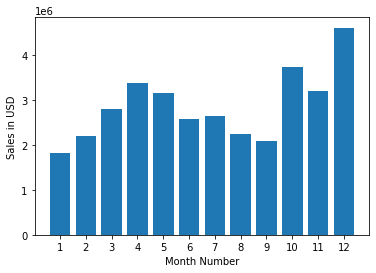

In [53]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, question1['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month Number')
plt.show()

## Question 2: What city had the highest number of sales?

In [61]:
question2 = all_data.groupby('City').sum()
question2

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),16602,2779908.20,2795498.58,104794
Austin (TX),11153,1809873.61,1819581.75,69829
Boston (MA),22528,3637409.77,3661642.01,141112
Dallas (TX),16730,2752627.82,2767975.40,104620
Los Angeles (CA),33289,5421435.23,5452570.80,208325
New York City (NY),27932,4635370.83,4664317.43,175741
Portland (ME),2750,447189.25,449758.27,17144
Portland (OR),11303,1860558.22,1870732.34,70621
San Francisco (CA),50239,8211461.74,8262203.91,315520


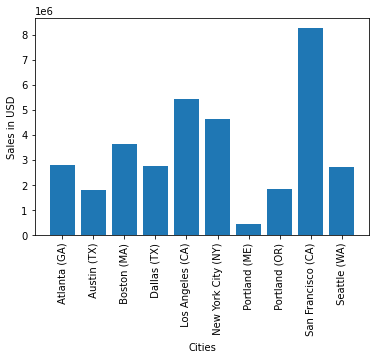

In [64]:
cities = [city for city, df in all_data.groupby('City')]            # Getting city names in the same order as in the DF

plt.bar(cities, question2['Sales'])
plt.xticks(cities, rotation = 'vertical')
plt.ylabel('Sales in USD')
plt.xlabel('Cities')
plt.show()

## Question 3: What time should we display to maximize likelihodd of customer's buying product?

In [66]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001",Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215",Boston (MA)
2,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,9,"840 Highland St, Los Angeles, CA 90001",Los Angeles (CA)
186845,259354,iPhone,1,700.00,700.00,09/01/19 16:00,9,"216 Dogwood St, San Francisco, CA 94016",San Francisco (CA)
186846,259355,iPhone,1,700.00,700.00,09/23/19 07:39,9,"220 12th St, San Francisco, CA 94016",San Francisco (CA)
186847,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,9,"511 Forest St, San Francisco, CA 94016",San Francisco (CA)


In [67]:
# We will get the time by converting the Order Date into a datetime object

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


C:\Users\teddy\AppData\Local\Temp/ipykernel_10524/2037556316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [70]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

C:\Users\teddy\AppData\Local\Temp/ipykernel_10524/3372403121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour'] = all_data['Order Date'].dt.hour
C:\Users\teddy\AppData\Local\Temp/ipykernel_10524/3372403121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Minute'] = all_data['Order Date'].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001",Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215",Boston (MA),22,30
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,4,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),9,27


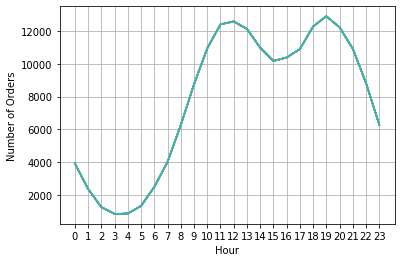

In [76]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.show()

# recomendation is around 11:00 and 19:00

## Question 4: What products are most often sold together?

In [97]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]  # Finding duplicates and keeping every row with a duplicate


df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))  # Joining products into one column

df = df[['Order ID', 'Grouped']].drop_duplicates()  # Drop duplicates because its only one order
df.head()

C:\Users\teddy\AppData\Local\Temp/ipykernel_10524/2993932903.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))  # Joining products into one column


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [101]:
from itertools import combinations
from collections import Counter

count = Counter()   # Creating a counter

for row in df['Grouped']:   # For every row in Grouped column
    row_list = row.split(',')   # split that row into row_list
    count.update(Counter(combinations(row_list, 2)))    # Count how many combinations of two are there

for key, value in count.most_common(10):
    print(key, value)




('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Question 5: What product sold the most? Why do you think it sold the most?

In [103]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001",Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215",Boston (MA),22,30
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,4,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),9,27


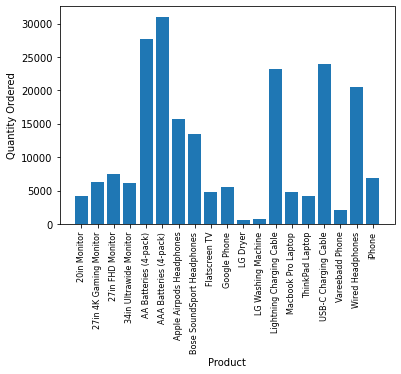

In [108]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

In [110]:
prices = all_data.groupby('Product').mean()['Price Each']   # Grop by producs and take the mean of Price each
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\teddy\AppData\Local\Temp/ipykernel_10524/3081654159.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size = 8)


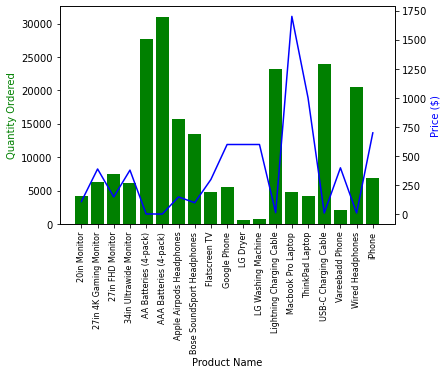

In [120]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color ='b')
ax1.set_xticklabels(products, rotation='vertical', size = 8)
plt.show()